<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/II.%20Introduccion_Ciencia_Datos/Tarea_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk
nltk.download('popular')
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [2]:
pagina=requests.get('https://es.wikipedia.org/wiki/Crimen_de_lesa_humanidad')#va al servidor y trae la página
pagina#El response [200] indica que la comunicacion con el servidor fue exitoso

<Response [200]>

In [3]:
contenido=pagina.text
contenido

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Crimen de lesa humanidad - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [4]:
soup=BeautifulSoup(contenido,'lxml')

In [5]:
#print(soup.prettify())#estructura en arbol del html

In [6]:
soup.title.string

'Crimen de lesa humanidad - Wikipedia, la enciclopedia libre'

In [7]:
title=soup.find('h1').get_text()
title

'Crimen de lesa humanidad'

In [8]:
#soup.find('body')

In [9]:
#Extraemos todos los parrafos del cuerpo

In [10]:
parrafos=soup.find('body').find_all('p')#llama a los parrafos del cuerpo del texto
parrafos

[<p>Se consideran <b>crimen de lesa humanidad</b> —o <b>crimen contra la humanidad</b>— cualquiera de las atrocidades y <a class="mw-redirect" href="/wiki/Delitos" title="Delitos">delitos</a> de carácter inhumano,<sup class="reference separada" id="cite_ref-1"><a href="#cite_note-1"><span class="corchete-llamada">[</span>1<span class="corchete-llamada">]</span></a></sup>​ que forman parte de un ataque generalizado o sistemático contra una población civil, cometido para aplicar las políticas de un Estado o una organización.<sup class="reference separada" id="cite_ref-EROMA_2-0"><a href="#cite_note-EROMA-2"><span class="corchete-llamada">[</span>2<span class="corchete-llamada">]</span></a></sup>​<sup class="reference separada" id="cite_ref-Lozada_3-0"><a href="#cite_note-Lozada-3"><span class="corchete-llamada">[</span>3<span class="corchete-llamada">]</span></a></sup>​<sup class="reference separada" id="cite_ref-ACNUR_4-0"><a href="#cite_note-ACNUR-4"><span class="corchete-llamada">[</s

In [11]:
#Efectuamos una limpieza de los parrafos

In [12]:
import re

def limpiarhtml(html):
  expresion=re.compile('<.*?>')
  text=re.sub(expresion,' ',html)
  return text


In [13]:
for elemento in parrafos:
  print(limpiarhtml(str(elemento)))

 Se consideran  crimen de lesa humanidad  —o  crimen contra la humanidad — cualquiera de las atrocidades y  delitos  de carácter inhumano,   [ 1 ]   ​ que forman parte de un ataque generalizado o sistemático contra una población civil, cometido para aplicar las políticas de un Estado o una organización.   [ 2 ]   ​   [ 3 ]   ​   [ 4 ]   ​ Los crímenes de lesa humanidad son una de las cuatro clases de  crímenes  que la  Organización de las Naciones Unidas  considera de mayor trascendencia para la comunidad internacional, junto al crimen de  genocidio , los  crímenes de guerra  y el  crimen de agresión . Estos conceptos comenzaron a ser definidos en el marco de las Naciones Unidas, al finalizar la Segunda Guerra Mundial, ante la preocupación generada por los genocidios que «en todos los períodos de la historia ha infligido grandes pérdidas a la humanidad».   [ 5 ]   ​
 
 Los delitos de lesa humanidad, cometidos como parte de un ataque generalizado o sistemático contra una población civil

In [32]:
text_1=soup.get_text(strip=True)
original_tokens=[t for t in text_1.split()]

In [28]:
from nltk.tokenize import word_tokenize
original_tokens=word_tokenize(text_1)
original_tokens=[x.lower() for x in original_tokens]

In [29]:
clean_tokens=[word for word in original_tokens if word.isalpha()]
print(clean_tokens[:100])

['crimen', 'de', 'lesa', 'humanidad', 'wikipedia', 'la', 'enciclopedia', 'libreir', 'al', 'contenidomenú', 'principalmenú', 'principalmover', 'a', 'la', 'barra', 'lateralocultarnavegaciónportadaportal', 'de', 'la', 'comunidadactualidadcambios', 'recientespáginas', 'nuevaspágina', 'aleatoriaayudadonacionesnotificar', 'un', 'erroridiomaslos', 'enlaces', 'de', 'idiomas', 'se', 'encuentran', 'en', 'la', 'parte', 'superior', 'de', 'la', 'página', 'frente', 'al', 'una', 'cuentaaccederherramientas', 'personalescrear', 'una', 'cuentaaccederpáginas', 'para', 'editores', 'desconectadosmás', 'informacióncontribucionesdiscusióncontenidosmover', 'a', 'la', 'barra', 'de', 'imprescriptibilidad', 'de', 'los', 'crímenes', 'contra', 'la', 'por', 'la', 'de', 'histórico', 'de', 'atrocidades', 'por', 'número', 'de', 'a', 'la', 'tabla', 'de', 'contenidoscambiar', 'a', 'la', 'tabla', 'de', 'contenidoscrimen', 'de', 'lesa', 'indonesiaíslenskaitaliano日本語kabɩyɛ한국어кыргызчаlatinalietuviųмакедонскимонголbahasa', '

In [37]:
sr=nltk.corpus.stopwords.words('spanish')
sr.sort
clean2_tokens=[word for word in clean_tokens if not word in sr]
print(len(clean_tokens))
print(len(clean2_tokens))

4922
3188


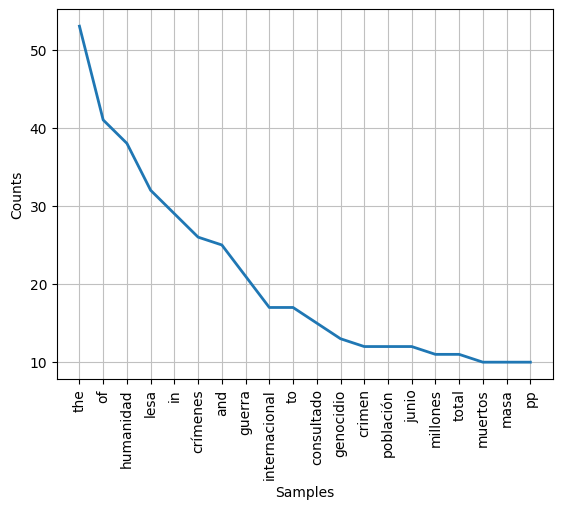

In [43]:
freq=nltk.FreqDist(clean2_tokens)
freq.plot(20,cumulative=False)
plt.show()

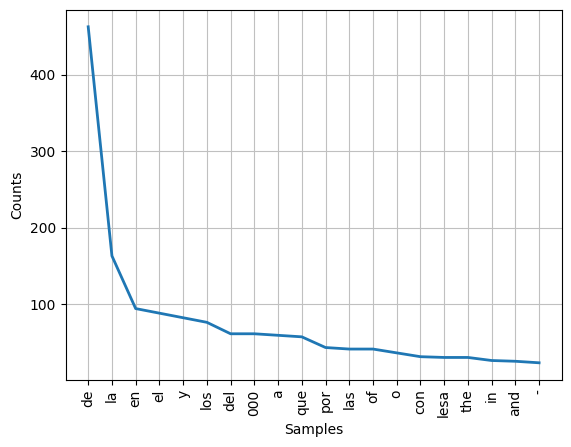

In [44]:
freq2=nltk.FreqDist(original_tokens)
freq2.plot(20,cumulative=False)
plt.show()

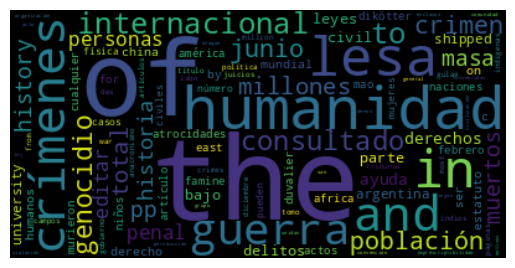

In [47]:
from os import path
from PIL import Image
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='black',random_state=15).generate_from_frequencies(freq)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
#Extraemos la tabla de la página web

In [15]:
tabla=soup.find('table',attrs={'class':'wikitable sortable'})

In [16]:
tabla_data=tabla.find_all('tr')#devuelve todas las filas de la tabla

tabla_data[1]


<tr>
<th>Atrocidad
</th>
<th>Ubicación
</th>
<th>Fecha de inicio
</th>
<th>Fecha final
</th>
<th>Estimación del número de muertos más bajo (excluyendo el negacionismo)
</th>
<th>Estimación del número de muertos más alto
</th>
<th>Otras estadísticas
</th></tr>

In [17]:
headers=[]
for th in tabla_data[1].find_all('th'):
  headers.append(th.text.replace('\n',' ').strip())
headers

['Atrocidad',
 'Ubicación',
 'Fecha de inicio',
 'Fecha final',
 'Estimación del número de muertos más bajo (excluyendo el negacionismo)',
 'Estimación del número de muertos más alto',
 'Otras estadísticas']

In [18]:
#print(tabla)

In [19]:
columnas=[]
tabla_data2=[]
for tr in tabla.find_all('tr'):
  for th in tr.find_all('th'):
    columnas.append(th.text.replace('\n',' ').strip())

  fila={}
  for td,th in zip(tr.find_all('td'),columnas[1:]):
    fila[th]=td.text.replace('\n',' ').strip()
  if len(fila)!=0:
    tabla_data2.append(fila)

tabla_data2

[{'Atrocidad': 'Invasiones mongolas',
  'Ubicación': 'Asia y Europa',
  'Fecha de inicio': '1206',
  'Fecha final': '1405',
  'Estimación del número de muertos más bajo (excluyendo el negacionismo)': '60 000 000',
  'Estimación del número de muertos más alto': '80 000 000',
  'Otras estadísticas': 'Hasta 60 millones de personas fueron asesinadas durante las invasiones de Genghis Khan y un máximo adicional de 20 millones bajo las campañas de Temerlán, totalizando una cifra superior a los 80 millones de personas[22]\u200b'},
 {'Atrocidad': 'Colonización europea de América',
  'Ubicación': 'América',
  'Fecha de inicio': '1492',
  'Fecha final': '1600',
  'Estimación del número de muertos más bajo (excluyendo el negacionismo)': '56\xa0000\xa0000[23]\u200b',
  'Estimación del número de muertos más alto': '90\xa0000\xa0000[24]\u200b',
  'Otras estadísticas': 'Murió gran parte de la población indígena de América.[25]\u200b'},
 {'Atrocidad': 'Gran Salto Adelante[26]\u200b',
  'Ubicación': 'Re

In [20]:
#Convertimos la tabla a un dataframe para el análisis de ser el caso

In [21]:
df=pd.DataFrame(tabla_data2)
df

,Atrocidad,Ubicación,Fecha de inicio,Fecha final,Estimación del número de muertos más bajo (excluyendo el negacionismo),Estimación del número de muertos más alto,Otras estadísticas
0,Invasiones mongolas,Asia y Europa,1206,1405,60 000 000,80 000 000,Hasta 60 millones de personas fueron asesinada...
1,Colonización europea de América,América,1492,1600,56 000 000[23]​,90 000 000[24]​,Murió gran parte de la población indígena de A...
2,Gran Salto Adelante[26]​,República Popular China,1958,1961,11 600 000[27]​,55 000 000[28]​,"Frank Dikötter estima que al menos 2,5 millone..."
3,Comercio árabe de esclavos,"Asia occidental, norte de África, este de Áfri...",Años 700,1899,7 545.000-(1500 - 1899)[32]​,70 000 000-(700s-1899)[33]​,
4,Holocausto Nazi,Territorios ocupados por el III Reich durante ...,1941[35]​,1945,6 000 000,18 653 000[36]​,Se estima que murieron más de 6 millones de ju...
...,...,...,...,...,...,...,...
62,Masacre de La Cantuta,Perú,1992,1992,10,10,
63,Masacre del Santa,Perú,1992,1992,9,9,
64,Masacre de Apartado[120]​,Colombia,2005,2005,8,8,
65,Masacre de La Cantuta,Perú,1992,1992,6,6,


In [22]:
#Extraemos todas las páginas web que se tienen como referencias

In [23]:
data=soup.find('div',attrs={'class':'listaref'})
for div in data:
  links=div.findAll('a')
  for a in links:
    if a['href'].startswith("http"):
      print(a['href'])

https://www.un.org/spanish/law/icc/statute/spanish/rome_statute(s).pdf
https://books.openedition.org/eunrn/3207?lang=es
https://eacnur.org/es/actualidad/noticias/emergencias/crimenes-de-lesa-humanidad-las-mayores-atrocidades-de-la-historia
https://journals.openedition.org/corpusarchivos/1159
https://dpej.rae.es/lema/imprescriptibilidad
https://myrnamack.org.gt/images/stories/fmm/archivos/analisis/2012/Analisis_Amnistia.pdf
https://www.cels.org.ar/common/documentos/sintesis_fallo_csjn_caso_poblete.pdf
http://servicios.infoleg.gob.ar/infolegInternet/anexos/270000-274999/274607/norma.htm
https://lapa.princeton.edu/hosteddocs/unive_jur.pdf
https://eprints.ucm.es/id/eprint/12666/1/bartolome_de_las_casas.pdf
http://www.iunma.edu.ar/doc/MB/lic_historia_mat_bibliografico/Historia%20Latinoamericana%20General/LAMGen%20Biblio/Roulet%20y%20Garrido%20%20-%20el%20genocidio%20en%20la%20historia.pdf
http://www.iunma.edu.ar/doc/MB/lic_historia_mat_bibliografico/Historia%20Latinoamericana%20General/LAMG